carbon_monoxide --> co_conc
sulphur_dioxide --> so2_conc
nitrogen_dioxide --> no2_conc   
ozone --> o3_conc
particulate_matter_2.5um --> pm2p5_conc
pm10_wildfires  -->  pmwf_conc  

nitrogen_monoxide --> no_conc

In [1]:
from myFunctions import getSum, getSum2
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
ds_name = 'cams-europe-air-quality-forecasts'  # dataset name
ds_time = '2022-01-01/2022-01-01'  
# ds_time = '2021-01-01/2021-12-31'  # year sum

# dataset variable
ds_variable = 'ozone'


[mean_data, latitude, longitude, rdata]= getSum.getSum_mean(ds_name=ds_name, ds_time=ds_time, ds_variable=ds_variable)
#[foo, rdata] = getSum2.getSum_day(ds_name=ds_name, ds_time=ds_time, ds_variable=ds_variable)

2022-06-04 18:32:51,122 INFO Welcome to the CDS
2022-06-04 18:32:51,122 INFO Sending request to https://ads.atmosphere.copernicus.eu/api/v2/resources/cams-europe-air-quality-forecasts
2022-06-04 18:32:51,170 INFO Request is queued
2022-06-04 18:32:52,200 INFO Request is running
2022-06-04 18:32:53,717 INFO Request is completed
2022-06-04 18:32:53,717 INFO Downloading https://download-0000-ads-clone.copernicus-climate.eu/cache-compute-0000/cache/data0/adaptor.cams_regional_fc.retrieve-1654360375.844218-13158-17-5863f1a4-d318-4cff-a8b5-e46f258cd790.nc to download.nc (26.9M)
2022-06-04 18:32:54,758 INFO Download rate 25.9M/s                             


In [3]:
# rdata.o3_conc.values

In [4]:
# print(mean_data)

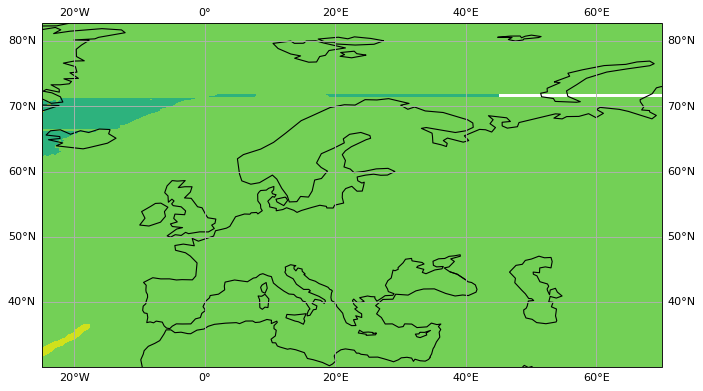

In [5]:
plt.figure(figsize=(10, 10), dpi=80)
ax = plt.axes(projection=ccrs.PlateCarree())

plt.contourf(longitude, latitude, mean_data, cmap='viridis',
             transform=ccrs.PlateCarree())

ax.set_extent([70,-25,30,80])
ax.coastlines()
ax.gridlines(draw_labels=True)

plt.show()